### Task: Feature Engineering
Extract additional features from the existing columns, such as the length of the restaurant name or address.
Create new features like "Has Table Booking "or "Has Online Delivery" by encodin gcategorical variables.

### Importing Libraries

In [3]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [5]:
# Importing the required dataset
df = pd.read_csv('Dataset .csv')

In [6]:
# getting first five rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


##### **Checking Number of Rows and Columns**

In [8]:
# Get number of rows and columns
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 9551
Number of columns: 21


##### **Check for Missing Values in Each Column and Handle Them Accordingly**

In [10]:
# Check for missing values in each column

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [11]:
# For categorical columns, you can either fill missing values with the mode (most frequent value) or drop them

df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

In [13]:
# Verify missing values after handling them

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


##### **Perform Data Type Conversion if Necessary**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Note - There is no need type Conversion.

#### **Extract Additional Features**

##### **1. Length of Restaurant Name**

In [19]:
# Add a new feature: Length of restaurant name
df['Name Length'] = df['Restaurant Name'].apply(len)

In [20]:
# Display the first few rows with the new feature
print(df[['Restaurant Name', 'Name Length']].head())

          Restaurant Name  Name Length
0        Le Petit Souffle           16
1        Izakaya Kikufuji           16
2  Heat - Edsa Shangri-La           22
3                    Ooma            4
4             Sambo Kojin           11


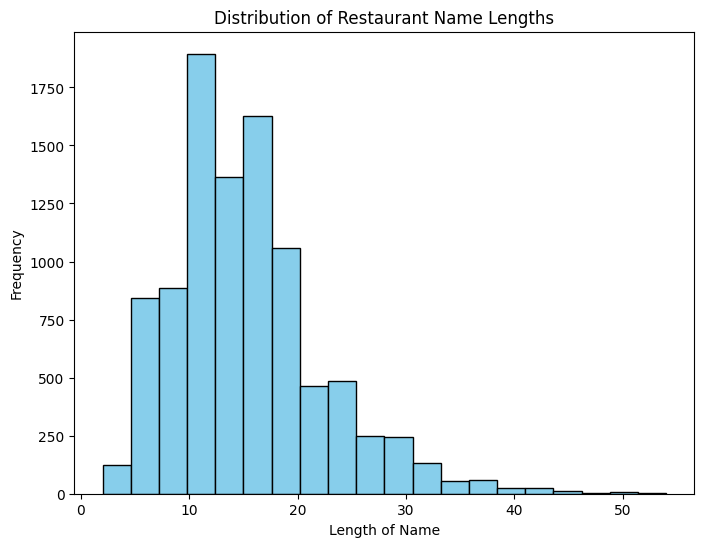

In [21]:
# Visualize the distribution of the name lengths
plt.figure(figsize=(8, 6))
df['Name Length'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Restaurant Name Lengths")
plt.xlabel("Length of Name")
plt.ylabel("Frequency")
plt.show()

##### **2. Length of Address**

In [23]:
# Add a new feature: Length of the address
df['Address Length'] = df['Address'].apply(len)

In [24]:
# Display the first few rows with the new feature
print(df[['Address', 'Address Length']].head())

                                             Address  Address Length
0  Third Floor, Century City Mall, Kalayaan Avenu...              71
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64


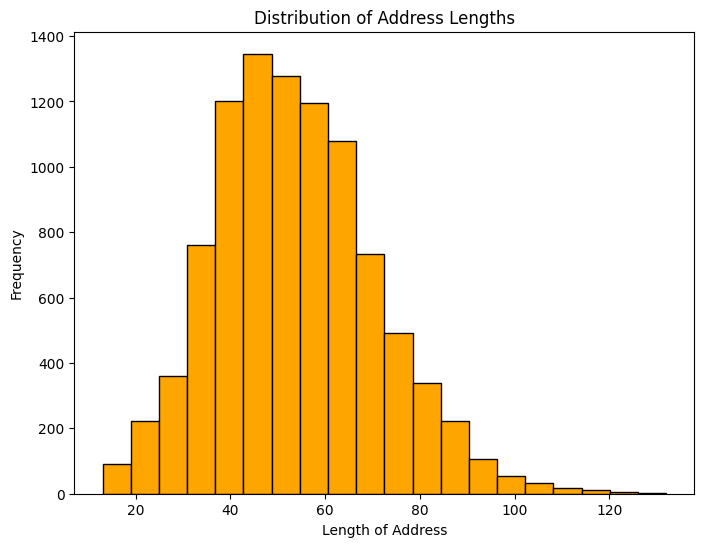

In [25]:
# Visualize the distribution of address lengths
plt.figure(figsize=(8, 6))
df['Address Length'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title("Distribution of Address Lengths")
plt.xlabel("Length of Address")
plt.ylabel("Frequency")
plt.show()

#### **Create New Features**

##### **1. Encode "Has Table Booking"**

In [28]:
# Convert 'Has Table booking' column to binary (Yes = 1, No = 0)
df['Has Table Booking (Binary)'] = df['Has Table booking'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

In [29]:
# Display the first few rows with the new feature
print(df[['Has Table booking', 'Has Table Booking (Binary)']].head())

  Has Table booking  Has Table Booking (Binary)
0               Yes                           1
1               Yes                           1
2               Yes                           1
3                No                           0
4               Yes                           1


##### **2. Encode "Has Online Delivery"**

In [31]:
# Convert 'Has Online delivery' column to binary (Yes = 1, No = 0)
df['Has Online Delivery (Binary)'] = df['Has Online delivery'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

In [32]:
# Display the first few rows with the new feature
print(df[['Has Online delivery', 'Has Online Delivery (Binary)']].head())

  Has Online delivery  Has Online Delivery (Binary)
0                  No                             0
1                  No                             0
2                  No                             0
3                  No                             0
4                  No                             0


##### **Verify and Save the Updated Dataset**

In [34]:
# Check the dataset with new features
print(df.head())

# Save the updated dataset for further analysis
df.to_csv('Dataset_with_features.csv', index=False)
print("Updated dataset saved as 'Dataset_with_features.csv'")

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 